In [1]:
# 1) Data Exploration

import pandas as pd
column_names = ['target','ids','date','flag','user','text']
# Loading the dataset
# df = pd.read_csv("twitter_data.csv", names = column_names,encoding='ISO-8859-1')
dtypes = {'target': str, 'ids': str}
df = pd.read_csv("twitter_data.csv", names=column_names, encoding='ISO-8859-1', dtype=dtypes, low_memory=False)
df

,target,ids,date,flag,user,text
0,Polarity,ID,Date,Flag,User,Text
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
...,...,...,...,...,...,...
1048571,4,1960186091,Fri May 29 07:33:42 PDT 2009,NO_QUERY,debraladiva,"Back home, thought I'd done for the week, but ..."
1048572,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048573,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048574,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...


In [2]:
# Displaying the basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  object
 1   ids     1048576 non-null  object
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: object(6)
memory usage: 48.0+ MB
None


In [3]:
# Displaying the first few rows of the dataset
print(df.head())

     target         ids                          date      flag  \
0  Polarity          ID                          Date      Flag   
1         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
2         0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
3         0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
4         0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0             User                                               Text  
1  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
2    scotthamilton  is upset that he can't update his Facebook by ...  
3         mattycus  @Kenichan I dived many times for the ball. Man...  
4          ElleCTF    my whole body feels itchy and like its on fire   


In [5]:
# 2) Data Cleaning

#  (i) Dropping the irrelevant columns
#  Drop unnecessary columns
# df = df[['target', 'text']]

# (i) Handling the missing values
df.dropna(inplace=True)

# (ii) Dropping the duplicate entries
df.drop_duplicates(inplace=True)

# (iii) Displaying the cleaned dataset
df.head()

,target,ids,date,flag,user,text
0,Polarity,ID,Date,Flag,User,Text
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


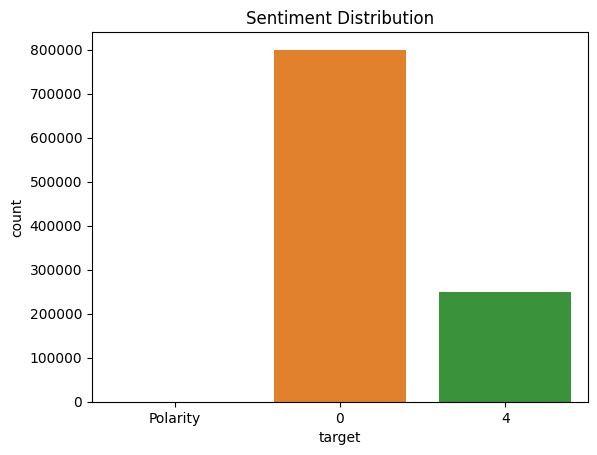

In [6]:
# 3) Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Conducting EDA to gain initial insights
# (e.g., summary statistics, distribution of tweet lengths)

# Visualizing sentiment distribution
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.show()

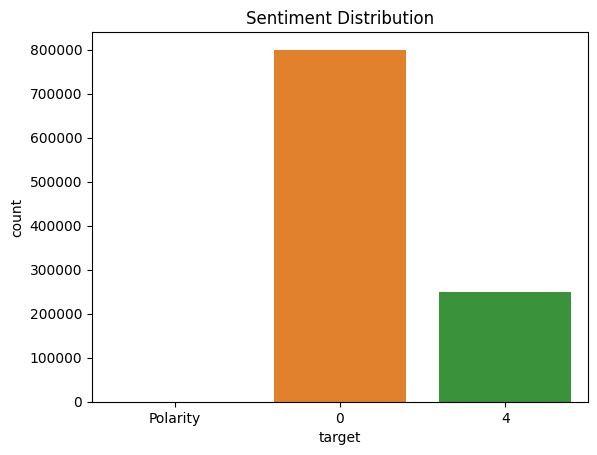

0           800000
4           248575
Polarity         1
Name: target, dtype: int64


In [16]:
# 4) Sentiment Distribution

# Visualizing the distribution of sentiment labels
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Analyzing the balance of sentiment classes
sentiment_counts = df['target'].value_counts()
print(sentiment_counts)

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


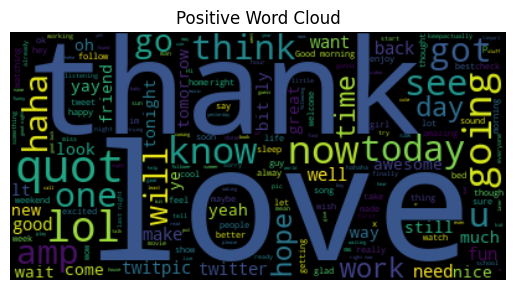

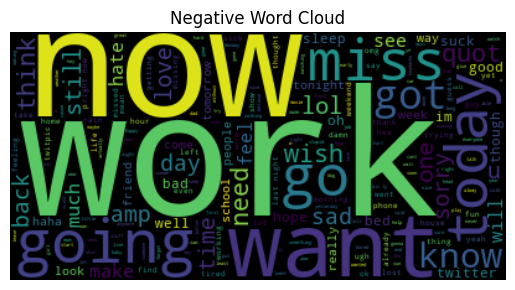

In [9]:
# 5) Word Frequency Analysis

from wordcloud import WordCloud

# Analyzing the word frequency in tweets
positive_tweets = df[df['target'] == 4]['text']
negative_tweets = df[df['target'] == 0]['text']

# Creating the word clouds for positive and negative sentiments
positive_wordcloud = WordCloud().generate(' '.join(positive_tweets))
negative_wordcloud = WordCloud().generate(' '.join(negative_tweets))

# Displaying the word clouds
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')
plt.show()

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')
plt.show()

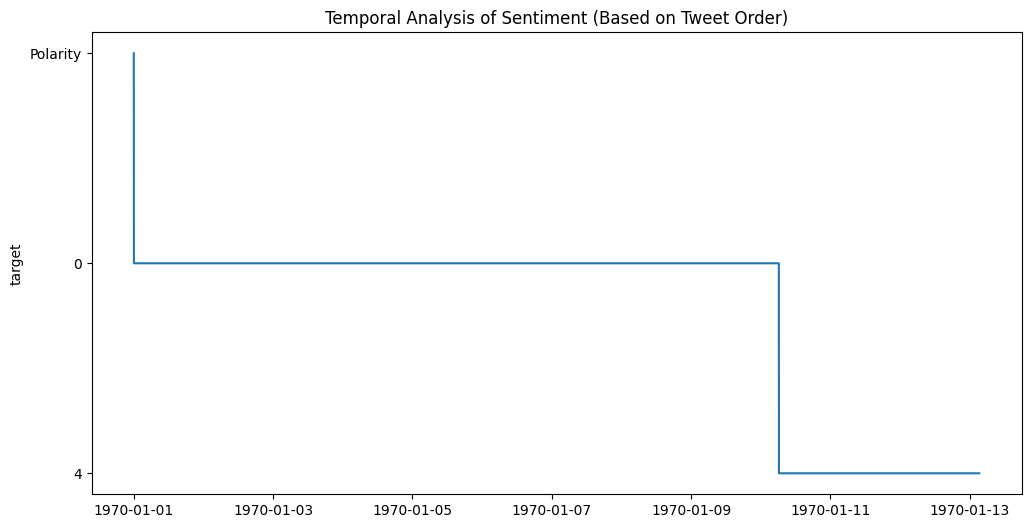

In [17]:
# 6) Temporal Analysis

# Assuming the index represents the order of tweets in the dataset
# Converting the index to datetime (assuming it's a numerical index)
df.index = pd.to_datetime(df.index, unit='s')  # 's' assumes the index is in seconds, adjust if needed

# Exploring how sentiment varies over the "pseudo-time" index
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='target', data=df)
plt.title('Temporal Analysis of Sentiment (Based on Tweet Order)')
plt.show()


In [11]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
pip install pandas nltk scikit-learn matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [5]:
# 7) Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)
df2 = df.head(15000)
df2['processed_text'] = df2['text'].apply(preprocess_text)
df2
print("After Text Processing:- ")
df2['processed_text']

After Text Processing:- 


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5128\397820761.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['processed_text'] = df2['text'].apply(preprocess_text)


0                                                     text
1        switchfoot awww thats bummer shoulda got david...
2        upset cant update facebook texting might cry r...
3        kenichan dived many time ball managed save res...
4                          whole body feel itchy like fire
                               ...                        
14995    jealous ia festivity im missing wk drake relay...
14996                 aubreyoday hey aubrey ya ya dk split
14997    twaiting wife come stair knock tivo leaf tomor...
14998                            yer hgistory presetnation
14999                            really miss talking missy
Name: processed_text, Length: 15000, dtype: object

In [6]:
# 7) Text Preprocessing

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)

df2 = df.head(1500).copy()  # Create a copy of the DataFrame

# Use .loc to modify the original DataFrame
df2.loc[:, 'processed_text'] = df2['text'].apply(preprocess_text)

# Display the DataFrame
print("After Text Processing:")
print(df2['processed_text'])


After Text Processing:
0                                                    text
1       switchfoot awww thats bummer shoulda got david...
2       upset cant update facebook texting might cry r...
3       kenichan dived many time ball managed save res...
4                         whole body feel itchy like fire
                              ...                        
1495    find mom rly annoying need detox ho day skin s...
1496        im bed way late likely sac shit work tomorrow
1497                             ylizabeth died never see
1498                   kcarruthers im year old pixie year
1499    body clock still chuffernote never ever stay l...
Name: processed_text, Length: 1500, dtype: object


In [7]:
# 8) Sentiment Prediction Model

X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['target'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
F1 Score: 1.00


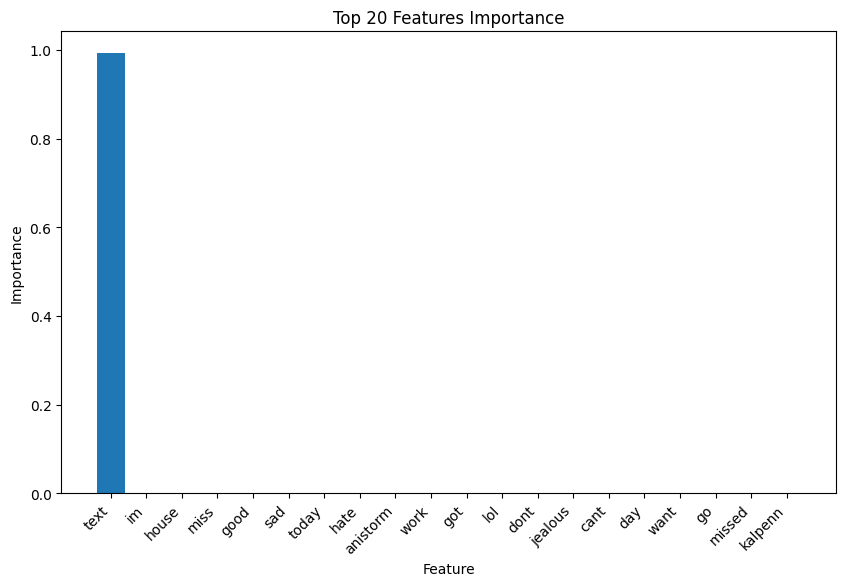

In [8]:
# 9) Feature Importance
feature_names = vectorizer.get_feature_names_out()
feature_importance = model.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
top_features = feature_df.nlargest(20, 'Importance')

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Features Importance')
plt.show()


In [18]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install ipywidgets


In [20]:
# 10. User Interface:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from ipywidgets import widgets, interact
from IPython.display import display

# Load the dataset
df = pd.read_csv('twitter_data.csv', header=None, encoding='ISO-8859-1')
df.columns = ['target', 'id', 'date', 'query', 'user', 'text']

# Remove unnecessary columns
df = df[['target', 'text']]

# Map target values to sentiment labels
df['sentiment'] = df['target'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

# Clean the text data (remove URLs, special characters, etc.)
def clean_text(text):
    # Your text cleaning code here
    # For simplicity, let's assume we only want to convert text to lowercase
    cleaned_text = text.lower()
    return cleaned_text

df['cleaned_text'] = df['text'].apply(clean_text)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_vectorized, y)

# Function to predict sentiment for input text
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]

# User Interface
def analyze_sentiment(input_text):
    result = predict_sentiment(input_text)
    print(f"Sentiment Prediction: {result}")

# Create interactive widget
text_input = widgets.Text(description="Enter text:", value="Lyx is cool")
interact(analyze_sentiment, input_text=text_input)


interactive(children=(Text(value='Lyx is cool', description='Enter text:'), Output()), _dom_classes=('widget-i…

<function __main__.analyze_sentiment(input_text)>